# Tugas Praktikum

Nama: Tirta Nurrochman Bintang Prawira

NIM: 2241720045

Kelas: TI-3A


No Absen: 27

# Tugas 1 (Opsional)

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data spam.csv
    2. Fitur CountVectorizer dengan mengaktifkan stop_words
    3. Evaluasi hasilnya
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data spam.csv
    2. Fitur TF-IDF dengan mengaktifkan stop_words
    3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC

data = pd.read_csv('dataset/voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

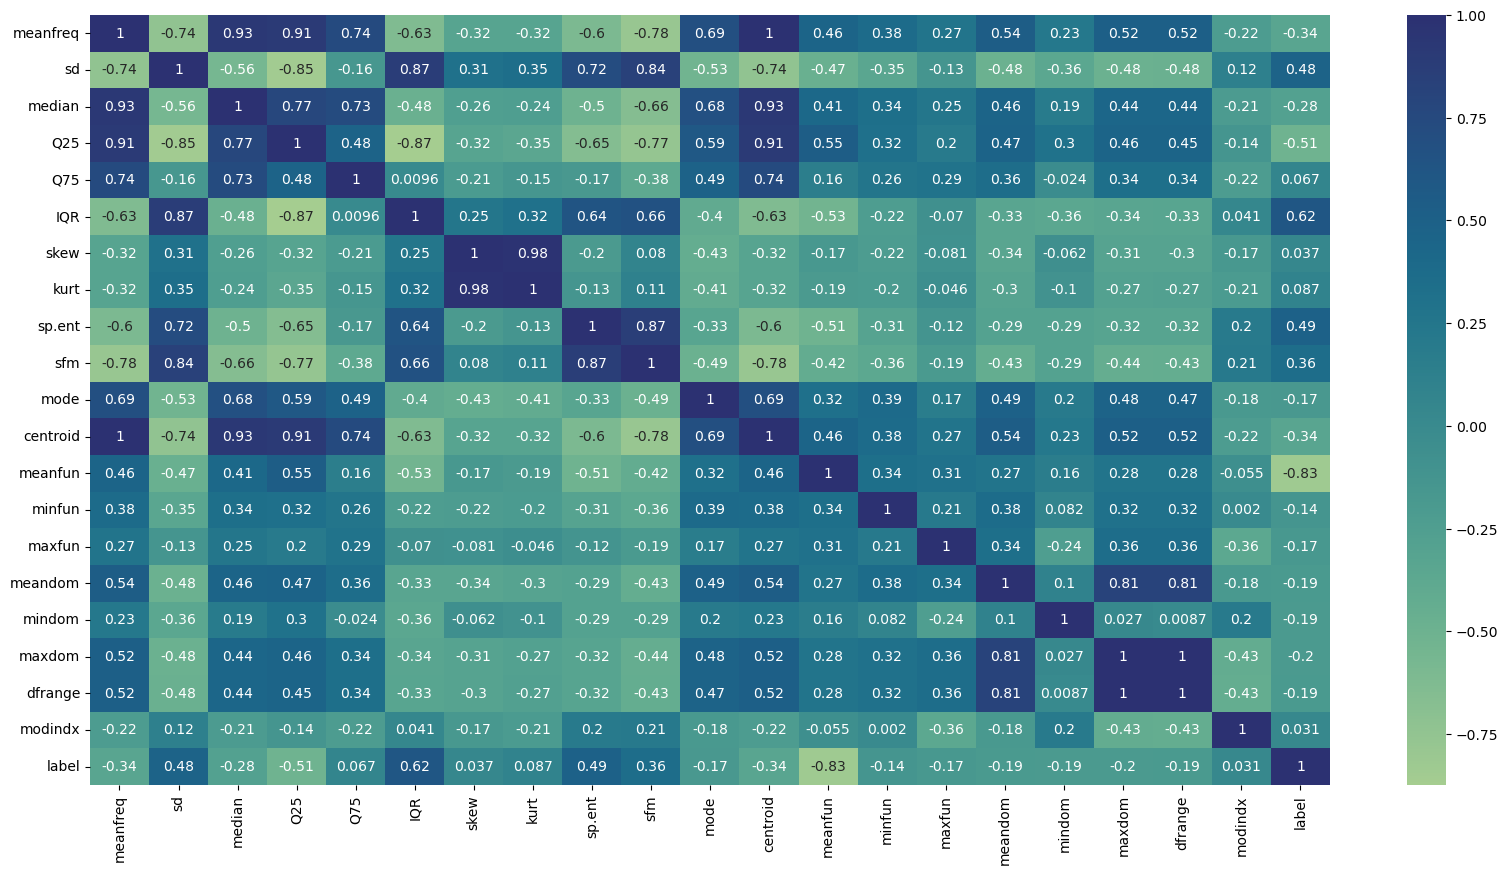

In [4]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap="crest", annot=True)
plt.show()

In [5]:
X = data.drop(columns='label')
y = data['label']

In [6]:
std = StandardScaler()

X = std.fit_transform(X)
X

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = SVC(kernel='rbf', C=100)
model.fit(X_train, y_train)

SVC(C=100)

In [11]:
from sklearn.metrics import accuracy_score

# Prediksi dengan data training
y_train_pred = model.predict(X_train)

# Evaluasi akurasi prediksi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi dengan data test
y_test_pred = model.predict(X_test)

# Evaluasi akurasi prediksi test
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train *100:.2f}%')
print(f'Hasil akurasi data test: {acc_test *100:.2f}%')

# Print laporan klasifikasi data test
print(f'Laporan klasifikasi data test\n {classification_report(y_test, y_test_pred)}')

Hasil akurasi data train: 100.00%
Hasil akurasi data test: 97.95%
Laporan klasifikasi data test
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [12]:

data = pd.read_csv('dataset/spam.csv', encoding='latin-1')
data = data.drop(data.iloc[:, 2:],axis=1)

new_cols = {
    'v1' : 'Labels',
    'v2' : 'SMS'
}
data = data.rename(columns=new_cols)

data.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
new_labels = {
    'spam' : 1,
    'ham' : 0
}

data['Labels'] = data['Labels'].map(new_labels)
data.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
X = data['SMS'].values
y = data['Labels'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bow = CountVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_bow = mnb.predict(X_train)

# Hasil akurasi data training
acc_train_bow = accuracy_score(y_train, y_train_pred_bow)

# Prediksi dengan data test
y_test_pred_bow = mnb.predict(X_test)

# Hasil akurasi data test
acc_test_bow = accuracy_score(y_test, y_test_pred_bow)

# Laporan klasifikasi
report_bow = classification_report(y_test, y_test_pred_bow)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train_bow *100:.2f}%')
print(f'Hasil akurasi data test: {acc_test_bow *100:.2f}%')

NameError: name 'CountVectorizer' is not defined